In [91]:
import keras
from keras.datasets import mnist
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
from keras.layers import Input
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

inputs = Input(shape=(28, 28, 1))

# a layer instance is callable on a tensor, and returns a tensor
output_1 = Conv2D(32, kernel_size=(3, 3),
                 activation='relu')(inputs)
output_2 = Conv2D(64, (3, 3), activation='relu')(output_1)
output_3 = MaxPooling2D(pool_size=(2, 2))(output_2)
output_4 = Dropout(0.25)(output_3)
output_5 = Flatten()(output_4)
output_6 = Dense(128, activation='relu')(output_5)
output_7 = Dropout(0.5)(output_6)
predictions = Dense(10, activation='softmax')(output_7)

model = Model(inputs=inputs, outputs=predictions)

# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [92]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.2604 - accuracy: 0.9202 - val_loss: 0.0542 - val_accuracy: 0.9813
Epoch 2/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0845 - accuracy: 0.9747 - val_loss: 0.0400 - val_accuracy: 0.9867
Epoch 3/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0649 - accuracy: 0.9807 - val_loss: 0.0316 - val_accuracy: 0.9899
Epoch 4/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0524 - accuracy: 0.9842 - val_loss: 0.0301 - val_accuracy: 0.9885
Epoch 5/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0481 - accuracy: 0.9854 - val_loss: 0.0300 - val_accuracy: 0.9905
Epoch 6/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.0295 - val_accuracy: 0.9901
Epoch 7/12
60000/60000 [==============================] - 3s 56us/st

In [0]:
score

[0.02834214517076225, 0.9912999868392944]

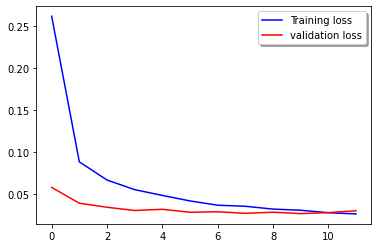

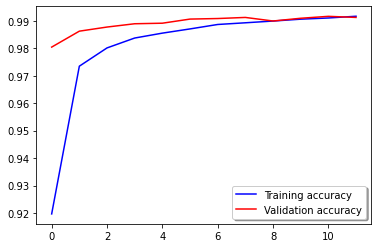

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], color='b', label="Training loss", )
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.show()

plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [5]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat

--2020-04-19 20:11:07--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  19.8MB/s    in 12s     

2020-04-19 20:11:19 (14.9 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [0]:
from scipy import io
v = io.loadmat('train_32x32.mat')

In [0]:
import numpy as np
import cv2 
X = v.get('X')
y = v.get('y')
def rgb2gray(rgb):
    return np.array(np.dot(rgb[...,:3], [0.299, 0.587, 0.144]))
formatted_x = []

for i in range(0, X.shape[3]):
  image = cv2.resize(np.array(X[:,:,:,i],dtype='uint8') ,(28,28))
  formatted_x.append(rgb2gray(image))

formatted_x = np.array(formatted_x)
formatted_x = formatted_x.reshape(formatted_x.shape[0], 28, 28, 1)/255



In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(formatted_x, y, test_size=0.33, random_state=42)

In [96]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=15)

Train on 49082 samples, validate on 24175 samples
Epoch 1/15
49082/49082 [==============================] - 3s 66us/step - loss: 1.2930 - accuracy: 0.5765 - val_loss: 0.6337 - val_accuracy: 0.8204
Epoch 2/15
49082/49082 [==============================] - 3s 67us/step - loss: 0.7284 - accuracy: 0.7829 - val_loss: 0.5055 - val_accuracy: 0.8554
Epoch 3/15
49082/49082 [==============================] - 3s 66us/step - loss: 0.6177 - accuracy: 0.8156 - val_loss: 0.4465 - val_accuracy: 0.8704
Epoch 4/15
49082/49082 [==============================] - 3s 66us/step - loss: 0.5596 - accuracy: 0.8321 - val_loss: 0.4626 - val_accuracy: 0.8750
Epoch 5/15
49082/49082 [==============================] - 3s 66us/step - loss: 0.5175 - accuracy: 0.8475 - val_loss: 0.4941 - val_accuracy: 0.8666
Epoch 6/15
49082/49082 [==============================] - 3s 66us/step - loss: 0.4946 - accuracy: 0.8514 - val_loss: 0.3861 - val_accuracy: 0.8893
Epoch 7/15
49082/49082 [==============================] - 3s 65us/st

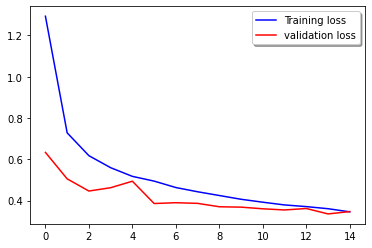

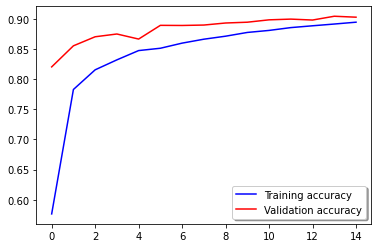

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], color='b', label="Training loss", )
plt.plot(history.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
plt.show()

plt.plot(history.history['accuracy'], color='b', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.show()

In [80]:
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2020-04-19 21:05:24--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  16.5MB/s    in 6.1s    

2020-04-19 21:05:30 (10.1 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



In [98]:
from scipy import io
v = io.loadmat('test_32x32.mat')
X = v.get('X')
y = v.get('y')
def rgb2gray(rgb):
    return np.array(np.dot(rgb[...,:3], [0.299, 0.587, 0.144]))
X_test = []

for i in range(0, X.shape[3]):
  image = cv2.resize(np.array(X[:,:,:,i],dtype='uint8') ,(28,28))
  X_test.append(rgb2gray(image))

X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)/255
y_test = label_binarizer.fit_transform(y)

model.evaluate(X_test, y_test)

26032/26032 [==============================] - 2s 65us/step


[0.3906261430459112, 0.8914797306060791]